In [7]:
!pip install -Uqq fastai duckduckgo_search
!pip install fastai fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 118.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 148.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 102.7 MB/s eta 0:00:00


In [17]:
from fastdownload import download_url
from fastai.vision.all import *
from fastbook import *
from fastdownload import download_url

In [34]:
urls = search_images_ddg('Micheal Scott ', max_images=2)

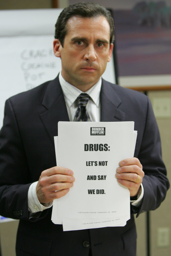

In [44]:
dest = "MichealScott.jpg"
download_url(urls[1], dest, show_progress = False)
Image.open(dest).to_thumb(256,256)

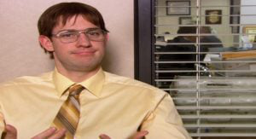

In [49]:
download_url(search_images_ddg('Jim from the office', max_images=1)[0], "jim.jpg", show_progress = False)
Image.open("jim.jpg").to_thumb(256,256)

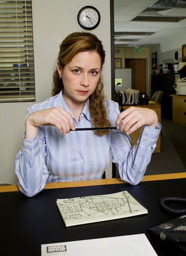

In [72]:
download_url(search_images_ddg('Pam from the office', max_images=3)[2], "pam.jpg", show_progress = False)
Image.open("pam.jpg").to_thumb(256,256)

Making a dataset by scraping the internet using search_image_ddg

In [63]:
searches = [
    "Ryan Howard",
    "Stanley Hudson",
    "Bob Vance",
    "Phyllis Vance",
    "Angela",
    "Dwight Schrute",
    "Andy Bernard",
    "Toby Flenderson",
    "Oscar Martinez",
    "Kevin Malone"
]
path = Path("data")
from time import sleep
for target in searches:
  dest = (path/target)
  dest.mkdir(exist_ok = True, parents = True)
  download_images(dest, urls=search_images_ddg(f"{target} FACE from THE OFFICE"))
  sleep(10)
  resize_images(path/target, max_size = 400, dest = path/target)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [64]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

319

In [65]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = "squish")]
).dataloaders(path, bs=32)

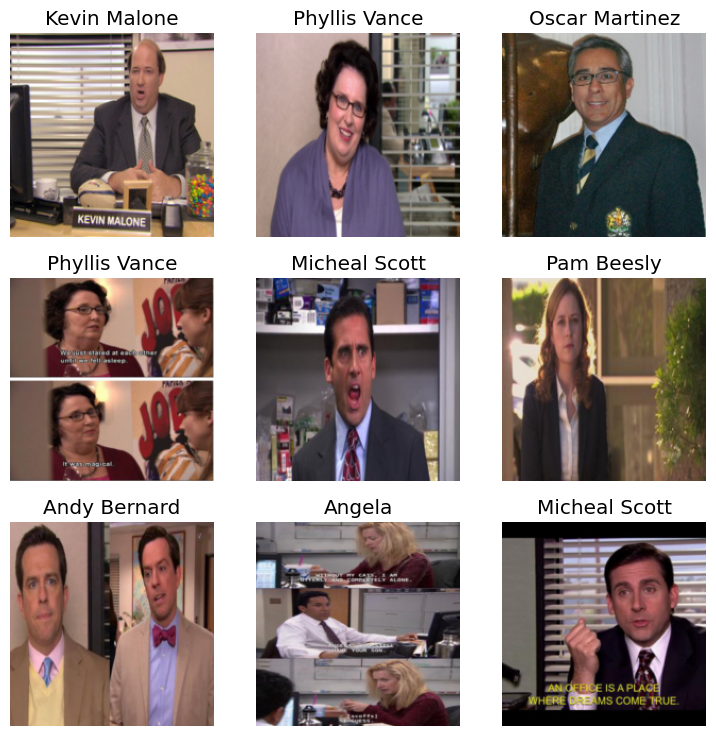

In [70]:
dls.show_batch()

In [71]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.066092,1.850883,0.535948,05:05


epoch,train_loss,valid_loss,error_rate,time
0,1.670373,1.428232,0.416122,07:55
1,1.125869,1.326726,0.363834,08:02
2,0.764552,1.350837,0.359477,07:59
3,0.487911,1.391536,0.320261,08:00
4,0.305100,1.290794,0.294118,08:02
5,0.180468,1.393871,0.294118,08:00
6,0.132413,1.310502,0.281046,07:59
7,0.093670,1.317527,0.267974,08:00
8,0.058743,1.318259,0.267974,08:00
9,0.054024,1.302244,0.270153,08:00


In [73]:
learn.save('theOfficeClassifier', with_opt=True, pickle_protocol=2)

Path('models/theOfficeClassifier.pth')

    The model can only Classify these characters
    "Michael Scott",
    "Jim Halpert",
    "Pam Beesly",
    "Ryan Howard",
    "Stanley Hudson",
    "Bob Vance",
    "Phyllis Vance",
    "Angela",
    "Dwight Schrute",
    "Andy Bernard",
    "Toby Flenderson",
    "Oscar Martinez",
    "Kevin Malone"

Try changing the Name Variable and playing around

THIS IS Kevin Malone


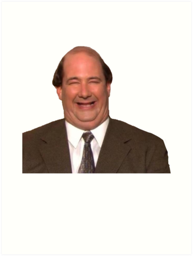

In [100]:
name = "Kevin Malone"
download_url(search_images_ddg(name + "FROM THE OFFICE", max_images=3)[0], name+".jpg", show_progress = False)
whoisthis, _, Probs = learn.predict(PILImage.create(name+".jpg"))
print(f"THIS IS {whoisthis}")
Image.open(name+".jpg").to_thumb(256,256)

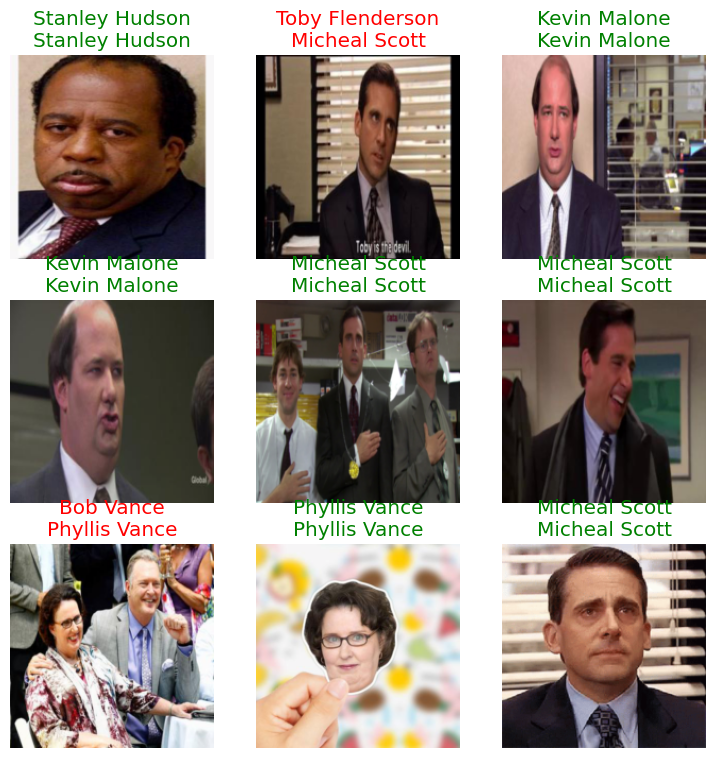

In [102]:
learn.show_results()